## Brief summary of the dataset

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Originally, the dataset has labels and identified as edible or poisonous. However, as we're going to apply clustering algorithms to dataset, we discard labels.

## Aim of the study 
As mentioned, clustering algorithms are going to be applied to dataset.  niye ?

## 	Write major findings of the analysis (at most 3 sentences)


## Website of the dataset
https://www.kaggle.com/uciml/mushroom-classification

## Helped from
https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load data set
raw = pd.read_csv("mushrooms.csv")

# Extract label's from dataset
label = raw['class']
data = raw.drop('class', axis = 1)

In [3]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


## Description of the dataset

#### Columns

In [4]:
print("# of columns: %d" % len(data.columns))
print(data.columns)

# of columns: 22
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


#### Sample size

In [5]:
data.shape

(8124, 22)

#### Data types
As it shownt that every single feature is categorical, string.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [7]:
# Describe data - know data
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
for col in data.columns:
    data[col] = data[col].astype('category', copy=False)
    

### Histogram of features

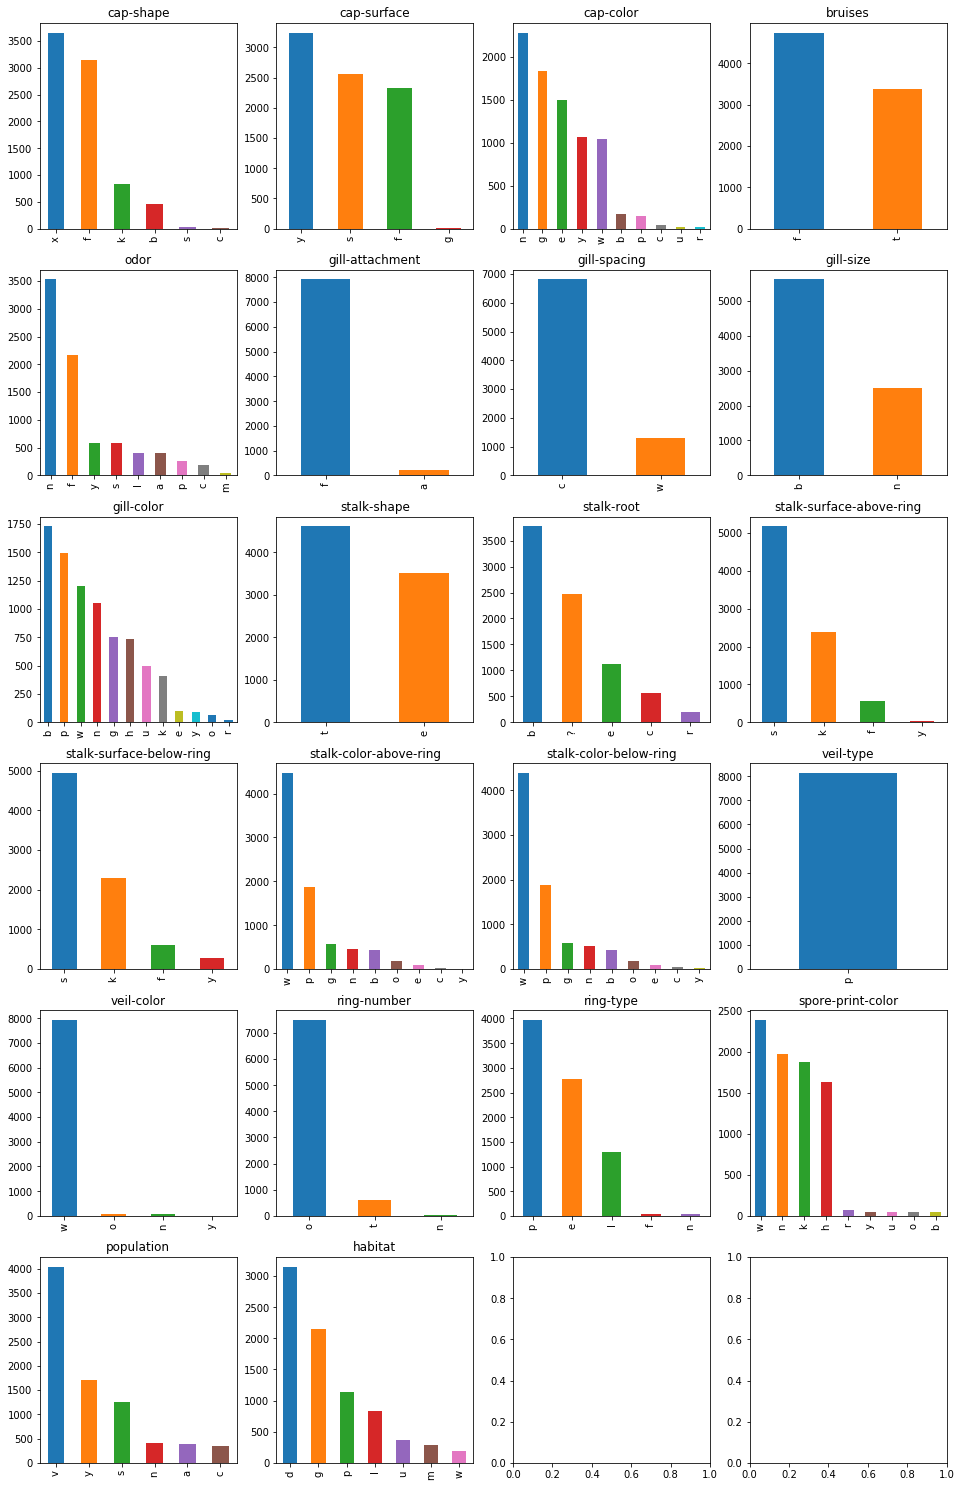

In [9]:
fig, axs = plt.subplots(nrows=6, ncols=4)

r = 0
c = 0
for col in data.columns:
    data[col].value_counts().plot(kind='bar',ax=axs[r][c], title=col)
    c = c + 1
    if c == 4:
        r = r + 1
        c = 0

plt.subplots_adjust(left=0.1, right=2.2, top=5, bottom=0)


### Missing values

Dataset do not contains null value. However, data provider mentioned that some values are missing and marked as '?'

The following code search for missing values. If there is a missing value in a column, it plots it.


Exist: 5644
Non Exist : 2480


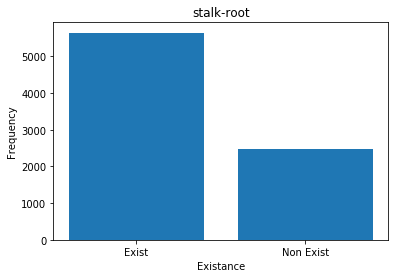

In [10]:
missing_features = []
def checkExistance():
    for col in data.columns:
        data_non_exist = data[data[col] == '?']

        if len(data_non_exist):
            missing_features.append(col)
            
    del data_non_exist
            
def plotMissingFeatures():
    for col in missing_features:      
        data_exist = data[data[col] != '?']
        data_non_exist = data[data[col] == '?']

        print("Exist:",len(data_exist))
        print("Non Exist :",len(data_non_exist))
        y = np.array([len(data_exist),len(data_non_exist)])
        x = ["Exist","Non Exist"]
        plt.bar(x,y)
        plt.title(col)
        plt.xlabel("Existance")
        plt.ylabel("Frequency")
        plt.show()

    del data_exist
    del data_non_exist
    
checkExistance()
plotMissingFeatures()


"stalk-root" feature has 2480 missing values. We want to investigate distribution of "stalk-root" values.

In [11]:
data["stalk-root"].unique()

[e, c, b, r, ?]
Categories (5, object): [e, c, b, r, ?]

As it shown below, most of the values of "stalk-root" is 'b'(%70). 

In [12]:
print("e %d"  % len(data[data["stalk-root"] == 'e']))
print("c %d"  % len(data[data["stalk-root"] == 'c']))
print("b %d"  % len(data[data["stalk-root"] == 'b']))
print("r %d"  % len(data[data["stalk-root"] == 'r']))

e 1120
c 556
b 3776
r 192


### Predicting values by using LogisticRegression

First of all, missing values needs to be seperated from original data. The missing subset will be predicted by using model.

In [13]:
data_miss = data.copy()

data_miss_target = data_miss[data_miss['stalk-root'] == '?']
data_miss_target = data_miss_target.drop('stalk-root', axis = 1)

data_miss_reg = data_miss[data_miss['stalk-root'] != '?']

Each feature of dataset are categorical. LogisticRegression can not handle categorical values. Thus, the features must encode.

In [14]:
from sklearn.preprocessing import LabelEncoder
def encode(df):
    df_copy = df.copy()
    for col in df_copy.columns:
        if col is 'stalk-root':
            df_copy[col].replace(['e','c','b','r'],[2,1,0,3])
        else:
            labelencoder=LabelEncoder()
            df_copy[col] = labelencoder.fit_transform(df_copy[col])
    
    return df_copy

encoded_miss_target = encode(data_miss_target)
encoded_miss_reg = encode(data_miss_reg)

encoded_miss_y = encoded_miss_reg['stalk-root']
encoded_miss_X = encoded_miss_reg.drop("stalk-root", axis = 1)

The dataset is encoded and ready for LogisticRegression. Split data to two subset, train and test. Train data will be used to train model and test data will be used to score how good model is. 

Logistic regression uses regularization to avoid overfitting-underfitting by default. By changing the parameter "C", stronger regularition can be applied.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
enc_X_train, enc_X_test, enc_y_train, enc_y_test = train_test_split(encoded_miss_X, encoded_miss_y, random_state=42)

reg = LogisticRegression(C=0.01)
reg.fit(enc_X_train, enc_y_train)
print("Training score %f" % reg.score(enc_X_train, enc_y_train))
print("Test score %f" % reg.score(enc_X_test, enc_y_test))

Training score 0.952752
Test score 0.936924


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


As it shown, traing and test score look well. Now, it's time to predict missing values.

In [16]:
predicted = reg.predict(encoded_miss_target)

encoded_miss_target['stalk-root'] = predicted
encoded_miss_target.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root
3984,3,2,0,1,1,1,0,0,1,0,...,0,4,0,2,1,0,4,0,4,1
4023,3,2,1,0,3,1,0,1,0,1,...,3,4,0,2,0,0,4,3,3,2
4076,1,2,6,0,1,1,0,1,3,0,...,3,4,0,2,0,1,1,4,0,0
4100,3,2,1,0,3,1,0,1,0,1,...,2,3,0,2,0,0,4,3,0,0
4104,3,2,3,0,0,1,0,1,0,1,...,2,3,0,2,0,0,4,3,2,0


Prediction of missing are done. As you remember, data was splitted into two to predict values. As we've predicted missing values, we can concat those two dataset into one.

In [17]:
print("Length of encoded_miss_target %d" % len(encoded_miss_target))
print("Length of encoded_miss_reg %d" % len(encoded_miss_reg))

data_concat = pd.concat([encoded_miss_target, encoded_miss_reg], sort = False)
data_concat.head()

Length of encoded_miss_target 2480
Length of encoded_miss_reg 5644


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root
3984,3,2,0,1,1,1,0,0,1,0,...,0,4,0,2,1,0,4,0,4,1
4023,3,2,1,0,3,1,0,1,0,1,...,3,4,0,2,0,0,4,3,3,2
4076,1,2,6,0,1,1,0,1,3,0,...,3,4,0,2,0,1,1,4,0,0
4100,3,2,1,0,3,1,0,1,0,1,...,2,3,0,2,0,0,4,3,0,0
4104,3,2,3,0,0,1,0,1,0,1,...,2,3,0,2,0,0,4,3,2,0


To understand data better, draw correlation matrix

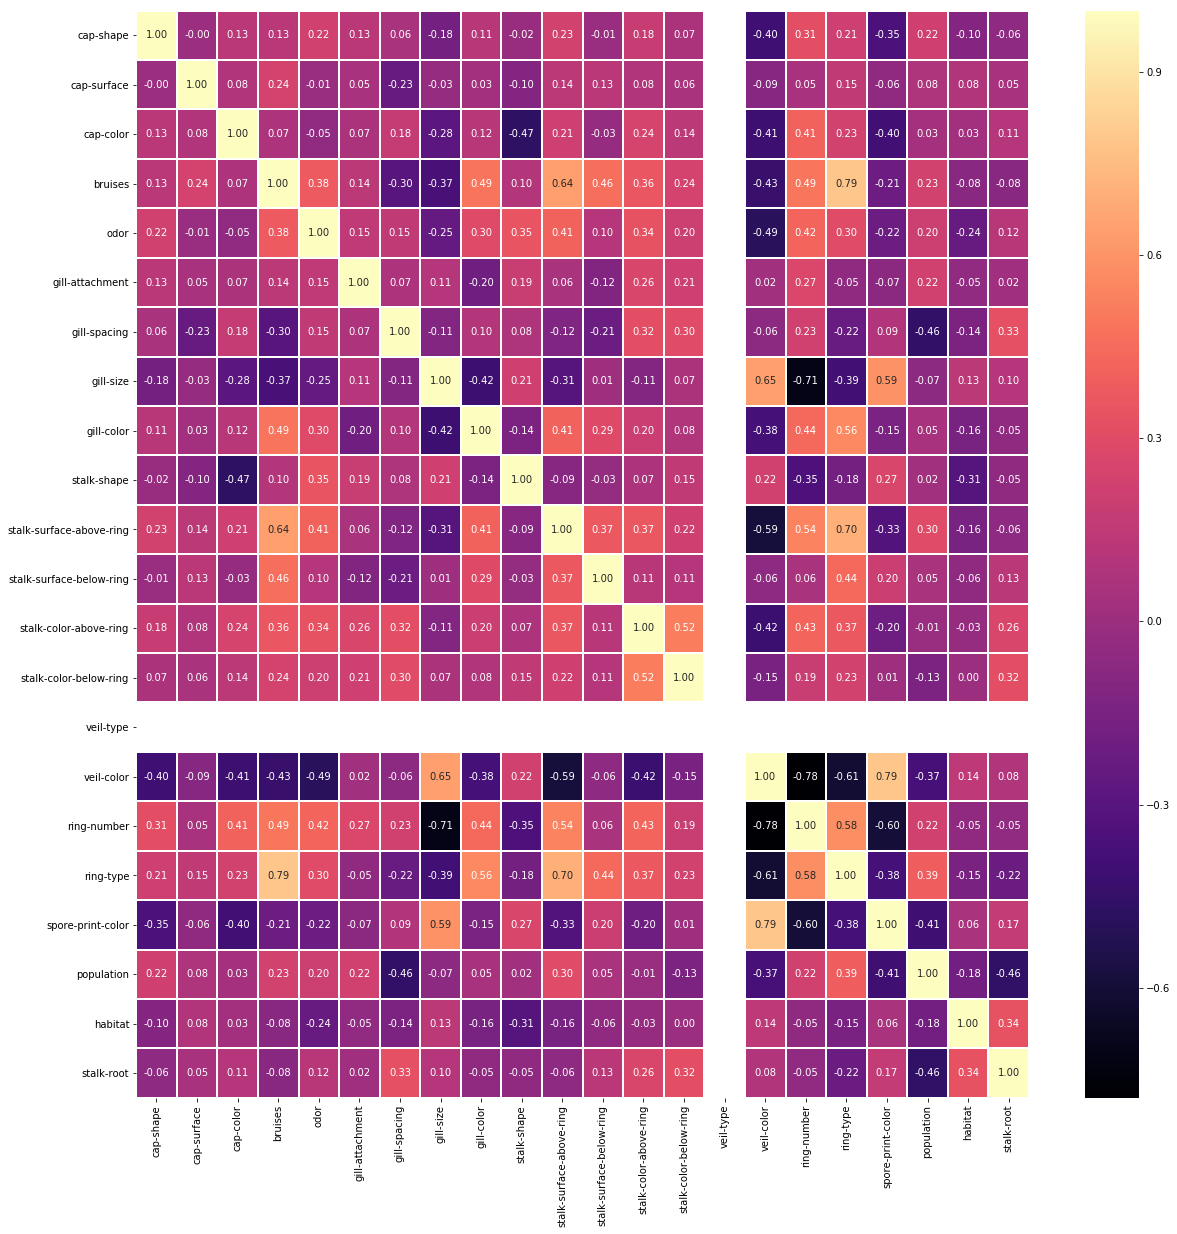

In [18]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data_concat.corr(), ax=ax, annot=True, linewidths=1, fmt= '.2f',cmap="magma")
plt.show()

"veil-type" has only one variable

In [19]:
data["veil-type"].unique()

[p]
Categories (1, object): [p]

So we can drop, veil-type as there is only one value.

In [20]:
data_concat = data_concat.drop('veil-type', axis = 1)

In [21]:
data_concat.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root
3984,3,2,0,1,1,1,0,0,1,0,...,2,0,4,2,1,0,4,0,4,1
4023,3,2,1,0,3,1,0,1,0,1,...,2,3,4,2,0,0,4,3,3,2
4076,1,2,6,0,1,1,0,1,3,0,...,0,3,4,2,0,1,1,4,0,0
4100,3,2,1,0,3,1,0,1,0,1,...,2,2,3,2,0,0,4,3,0,0
4104,3,2,3,0,0,1,0,1,0,1,...,2,2,3,2,0,0,4,3,2,0


#### Outliers

We could identify outliers with plotting. However, data has 22 dimensions. We decide to use PCA to visualize data.

## PCA

To apply pca, data is needed to be scaled.

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca_data  = scaler.fit_transform(data_concat)
pca_data

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int32 were all converted to float64 by StandardScaler.

D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int32 were all converted to float64 by StandardScaler.



array([[ 0.02387262,  0.39179868, -1.89860497, ..., -2.43801679,
         1.70900657,  0.38257321],
       [ 0.02387262,  0.39179868, -1.38941882, ..., -0.24736109,
         1.05410236,  1.4568991 ],
       [-1.20360321,  0.39179868,  1.15651192, ...,  0.48285748,
        -0.9106103 , -0.69175267],
       ...,
       [ 1.25134845,  1.24743643, -0.37104653, ...,  1.21307604,
         1.70900657, -0.69175267],
       [ 1.25134845,  1.24743643, -1.38941882, ..., -1.70779823,
        -0.9106103 ,  0.38257321],
       [-0.58986529,  1.24743643, -1.38941882, ..., -1.70779823,
        -0.9106103 ,  0.38257321]])

As we want to visualize the data by X and Y, we must transform data to 2 components. The following code does this:

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_trans = pca.fit_transform(pca_data)
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
explained_variance

array([5.73748676, 2.45280517])

No handles with labels found to put in legend.


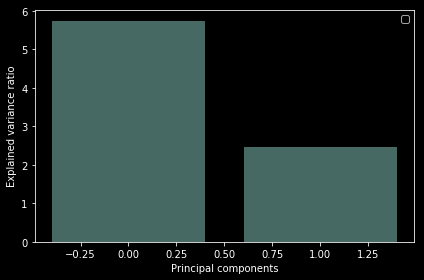

In [150]:
with plt.style.context('dark_background'):    
    plt.bar(np.arange(len(explained_variance)), explained_variance, alpha=0.5, align='center')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### Outlier ? 

There is no outlier

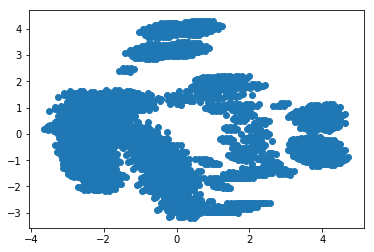

In [151]:
plt.scatter(pca_trans[:,0],pca_trans[:,1])
plt.show()

# K-Means

K-Means clustering will be used in this section. What cluster size is going to be ?

To select the best model, we will need a way to evaluate a K-Mean model's performance. We can measure the distance between each instance and its centroid and this is called inertia.

In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_k = []
inertias=[]
silhouette_scores=[]
rangemin=1
rangemax=15
for i in range(rangemin,rangemax):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=50,
                     algorithm="full", max_iter=300, random_state=1)
    kmeans.fit(data_concat)
    Ypreds=kmeans.predict(data_concat)
    inertias.append(kmeans.inertia_)
    kmeans_k.append(kmeans)
    if i>1:
        silhouette_scores.append(silhouette_score(data_concat, Ypreds))

So we need to find a cluster size that minimizes the inertia. However, as we increase cluster size, intertia goes lower values. So we need to find a optimum value. Plotting of inertia may help to select cluster size. We can select a cluster size value when plot starts to convergence. This method is called elbow method

Text(0, 0.5, 'Total within-cluster sum of squares')

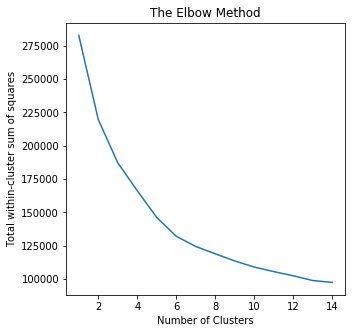

In [153]:
plt.figure(figsize=(5, 5))
plt.plot(range(rangemin, rangemax),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to  (𝑏−𝑎)/max(𝑎,𝑏)  where  𝑎  is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and  𝑏  is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes  𝑏 , excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Text(0, 0.5, 'Average silhouette score')

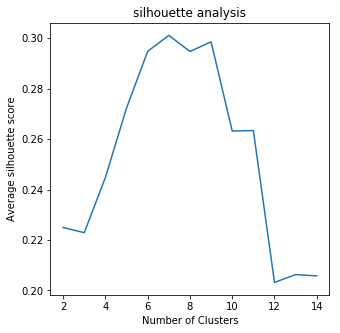

In [154]:
plt.figure(figsize=(5, 5))
plt.plot(range(rangemin+1, rangemax), silhouette_scores)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

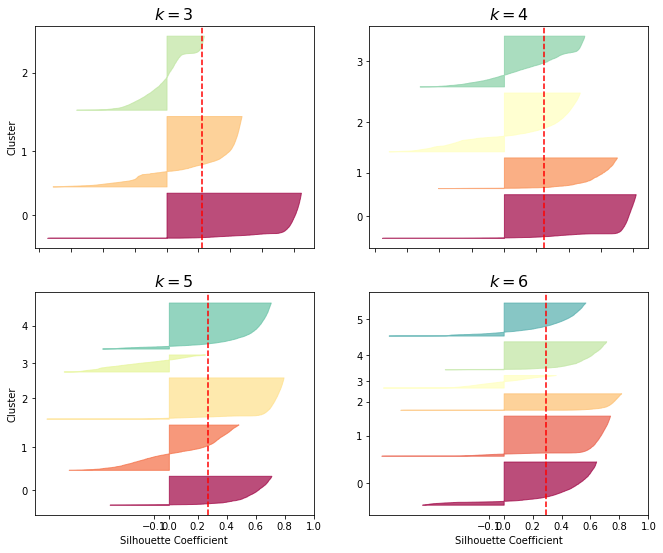

In [155]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(pca_trans, y_pred)

    padding = len(pca_trans) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

By analyzing both plots, choosing 6 as cluster size would be optimal solution

In [156]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init="k-means++", n_init=50,
                     algorithm="full", max_iter=300, random_state=1)
X_clustered = kmeans.fit_predict(pca_trans)

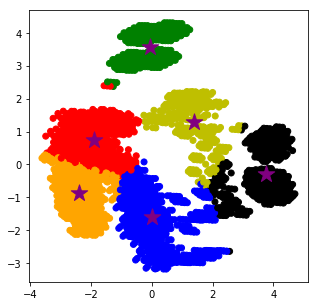

In [157]:
LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2: 'orange',
                   3: 'b',
                   4: "red",
                   5: "black",
                   6: "purple"
                  }
centroids = kmeans.cluster_centers_
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5, 5))
plt.scatter(pca_trans[:,0],pca_trans[:,1], c=label_color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='purple', label='centroid')
plt.show()

In [158]:
kmeans.cluster_centers_

array([[-7.53731602e-02,  3.56970897e+00],
       [ 1.39866069e+00,  1.29942476e+00],
       [-2.39071405e+00, -8.76334933e-01],
       [ 1.05040388e-03, -1.58753991e+00],
       [-1.91836341e+00,  7.57018488e-01],
       [ 3.75796050e+00, -2.87463056e-01]])

In [159]:
kmeans.inertia_

5357.6891405734095

AgglomerativeClustering is another clustering algorithm that clusters by hiearchical. Instances are close to each other goes to same cluster.

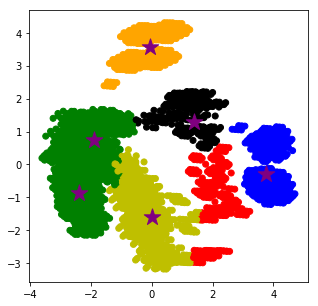

In [160]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=6, linkage="complete")
X_clustered = agg.fit_predict(pca_trans)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2: 'orange',
                   3: 'b',
                   4: "red",
                   5: "black",
                   6: "purple"
                  }
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5, 5))
plt.scatter(pca_trans[:,0],pca_trans[:,1], c=label_color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='purple', label='centroid')
plt.show()

In [161]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

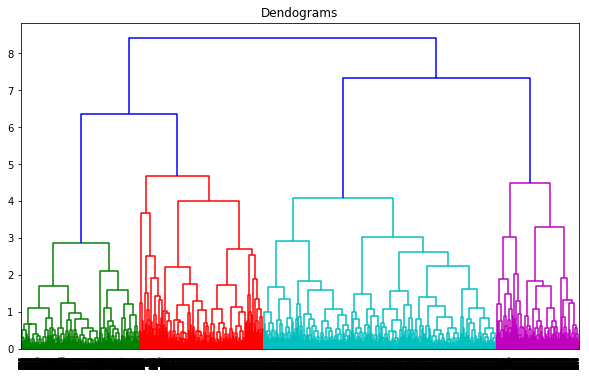

In [162]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 6))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(pca_trans, method='complete'))  